In [1]:
import game
import sys
import random
import matplotlib.pyplot as plt
import json
sys.setrecursionlimit(999999999)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
epoch = 5000
previousState = (-1,-1,-1,-1)
previousAction = 0
gamma = 0.8
Q = {}
scores = []
global score

In [3]:
def onFrameChange(isJumping,isDucked,nextObstacleDist,nextObstacleHeight,nextObstacleWidth,movementRate):
    global epoch
    global Q
    if isJumping or isDucked:
        return
    global previousAction
    global previousState
    currentState = (nextObstacleDist,nextObstacleHeight,nextObstacleWidth,movementRate)
    Q.setdefault(previousState,[0,0,0])
    if currentState not in Q:
        Q.setdefault(currentState,[0,0,0])
        randomAction = random.choice([0,0,1,2])
        if(randomAction == 1):
            game.jumpAction()
        elif(randomAction == 2):
            game.duckAction()
        if(previousAction == 0):
            Q[previousState][previousAction] = 0.1
        currentAction = randomAction
    else:
        maxActionIndex = 0
        for actionIndex in range(3):
            if(Q[currentState][actionIndex] > Q[currentState][maxActionIndex]):
                maxActionIndex = actionIndex
        if(maxActionIndex == 1):
            game.jumpAction()
        elif(maxActionIndex == 2):
            game.duckAction()
        if(previousAction == 0):    
            Q[previousState][previousAction] = 0.1 + gamma * Q[currentState][maxActionIndex]
        currentAction = maxActionIndex
        
    previousState = currentState
    previousAction = currentAction
        

def onCollide(score,isJumping,isDucked,nextObstacleDist,nextObstacleHeight,nextObstacleWidth,movementRate):
    global previousState
    global previousAction
    global epoch
    global Q
    global scores
    Q.setdefault(previousState,[0,0,0])
    Q[previousState][previousAction] -= 1
    if(isJumping):
        Q[previousState][1] -= 1
    elif(isDucked):
        Q[previousState][2] -= 1

    scores.append(score)
    game.changeEpisode()
    if(epoch>-1):
        epoch-=1
        previousState = (-1,-1,-1,-1)
        previousAction = 0
        game.restartWithMovementRate(onFrameChange,onCollide,onCrossedObstacle,onExit)
    else:
        return

def onCrossedObstacle(nextObstacleDist,nextObstacleHeight,nextObstacleWidth,movementRate):
    global previousState
    global previousAction
    Q[previousState][previousAction] += 1 # + gamma*Q[currentState][maxActionIndex]
    #currentState = (nextObstacleDist,nextObstacleHeight,nextObstacleWidth,movementRate)
    #Q.setdefault(currentState,[0,0,0])
    '''maxActionIndex = 0
    for actionIndex in range(3):
        if(Q[currentState][actionIndex] > Q[currentState][maxActionIndex]):
            maxActionIndex = actionIndex'''

def onExit(score):
    global scores
    scores.append(score)

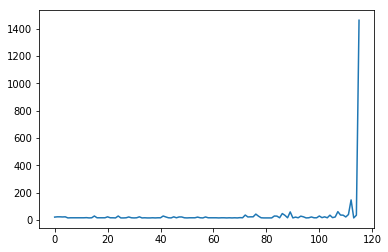

65211

In [4]:
game.init()
game.startEnvironment(onFrameChange,onCollide,onCrossedObstacle,onExit)
plt.plot(scores)
plt.show()
strQ = {}
for key in Q.keys():
    strQ[str(key)] = Q[key]
file = open("weights","w")
file.write(json.dumps(strQ))